IBM has gathered information on employee satisfaction, income, seniority and some demographics. It includes the data of 1470 employees.

In [ ]:
# Importing dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\SSS\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
fv=data.drop('Attrition',axis=1)
cl=data['Attrition']

"""About The Data:
Wants to predict the loss of employees that the company faced for any certain reason.
Be it retirement, resignation or any medical issue, etc."""

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [17]:
categoricals = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

for feature in categoricals:
    print(f"Values Counts for [{feature}]")
    print(data[feature].value_counts())
    print("\n\n")

Values Counts for [BusinessTravel]
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64



Values Counts for [Department]
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64



Values Counts for [Education]
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64



Values Counts for [EducationField]
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64



Values Counts for [EnvironmentSatisfaction]
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64



Values Counts for [Gender]
Male      882
Female    588
Name: Gender, dtype: int64



Values Counts for [JobInvolvement]
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64



Values Counts for [JobLevel]
1    543
2    534
3

In [18]:
data.drop(["Education","EmployeeNumber","EmployeeCount","Over18","StandardHours"],axis=1,inplace=True)

In [20]:
data[["EnvironmentSatisfaction","JobInvolvement","JobLevel","JobSatisfaction","PerformanceRating","RelationshipSatisfaction"]]=data[["EnvironmentSatisfaction","JobInvolvement","JobLevel","JobSatisfaction","PerformanceRating","RelationshipSatisfaction"]].astype(object)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   object
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   object
 11  JobLevel                  1470 non-null   object
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   object
 14  MaritalStatus           

In [22]:
data['PerformanceRating'] = data['PerformanceRating'].map({3: 0, 4: 1})

In [23]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
# from the above info we get to know that dataset not having null values.

In [ ]:
# check whether dataset is balanced or not.

In [24]:
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
# In problem statement column having heavily imbalanced data,we need to balance that.

In [ ]:
# find outlier

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'DailyRate'),
  Text(3, 0, 'DistanceFromHome'),
  Text(4, 0, 'Education'),
  Text(5, 0, 'EmployeeCount'),
  Text(6, 0, 'EmployeeNumber'),
  Text(7, 0, 'EnvironmentSatisfaction'),
  Text(8, 0, 'HourlyRate'),
  Text(9, 0, 'JobInvolvement'),
  Text(10, 0, 'JobLevel'),
  Text(11, 0, 'JobSatisfaction'),
  Text(12, 0, 'MonthlyIncome'),
  Text(13, 0, 'MonthlyRate'),
  Text(14, 0, 'NumCompaniesWorked'),
  Text(15, 0, 'PercentSalaryHike'),
  Text(16, 0, 'PerformanceRating'),
  Text(17, 0, 'RelationshipSatisfaction'),
  Text(18, 0, 'StandardHours'),
  Text(19, 0, 'StockOptionLevel'),
  Text(20, 0, 'TotalWorkingYears'),
  Text(21, 0, 'TrainingTimesLastYear'),
  Text(22, 0, 'WorkLifeBalance'),
  Text(23, 0, 'YearsAtCompany'),
  Text(24, 0, 'YearsInCurrentRole'),
  Text(25, 0, 'YearsSinceLastPromotion'),
  Text(26, 0, 'YearsWithCurrManager')])

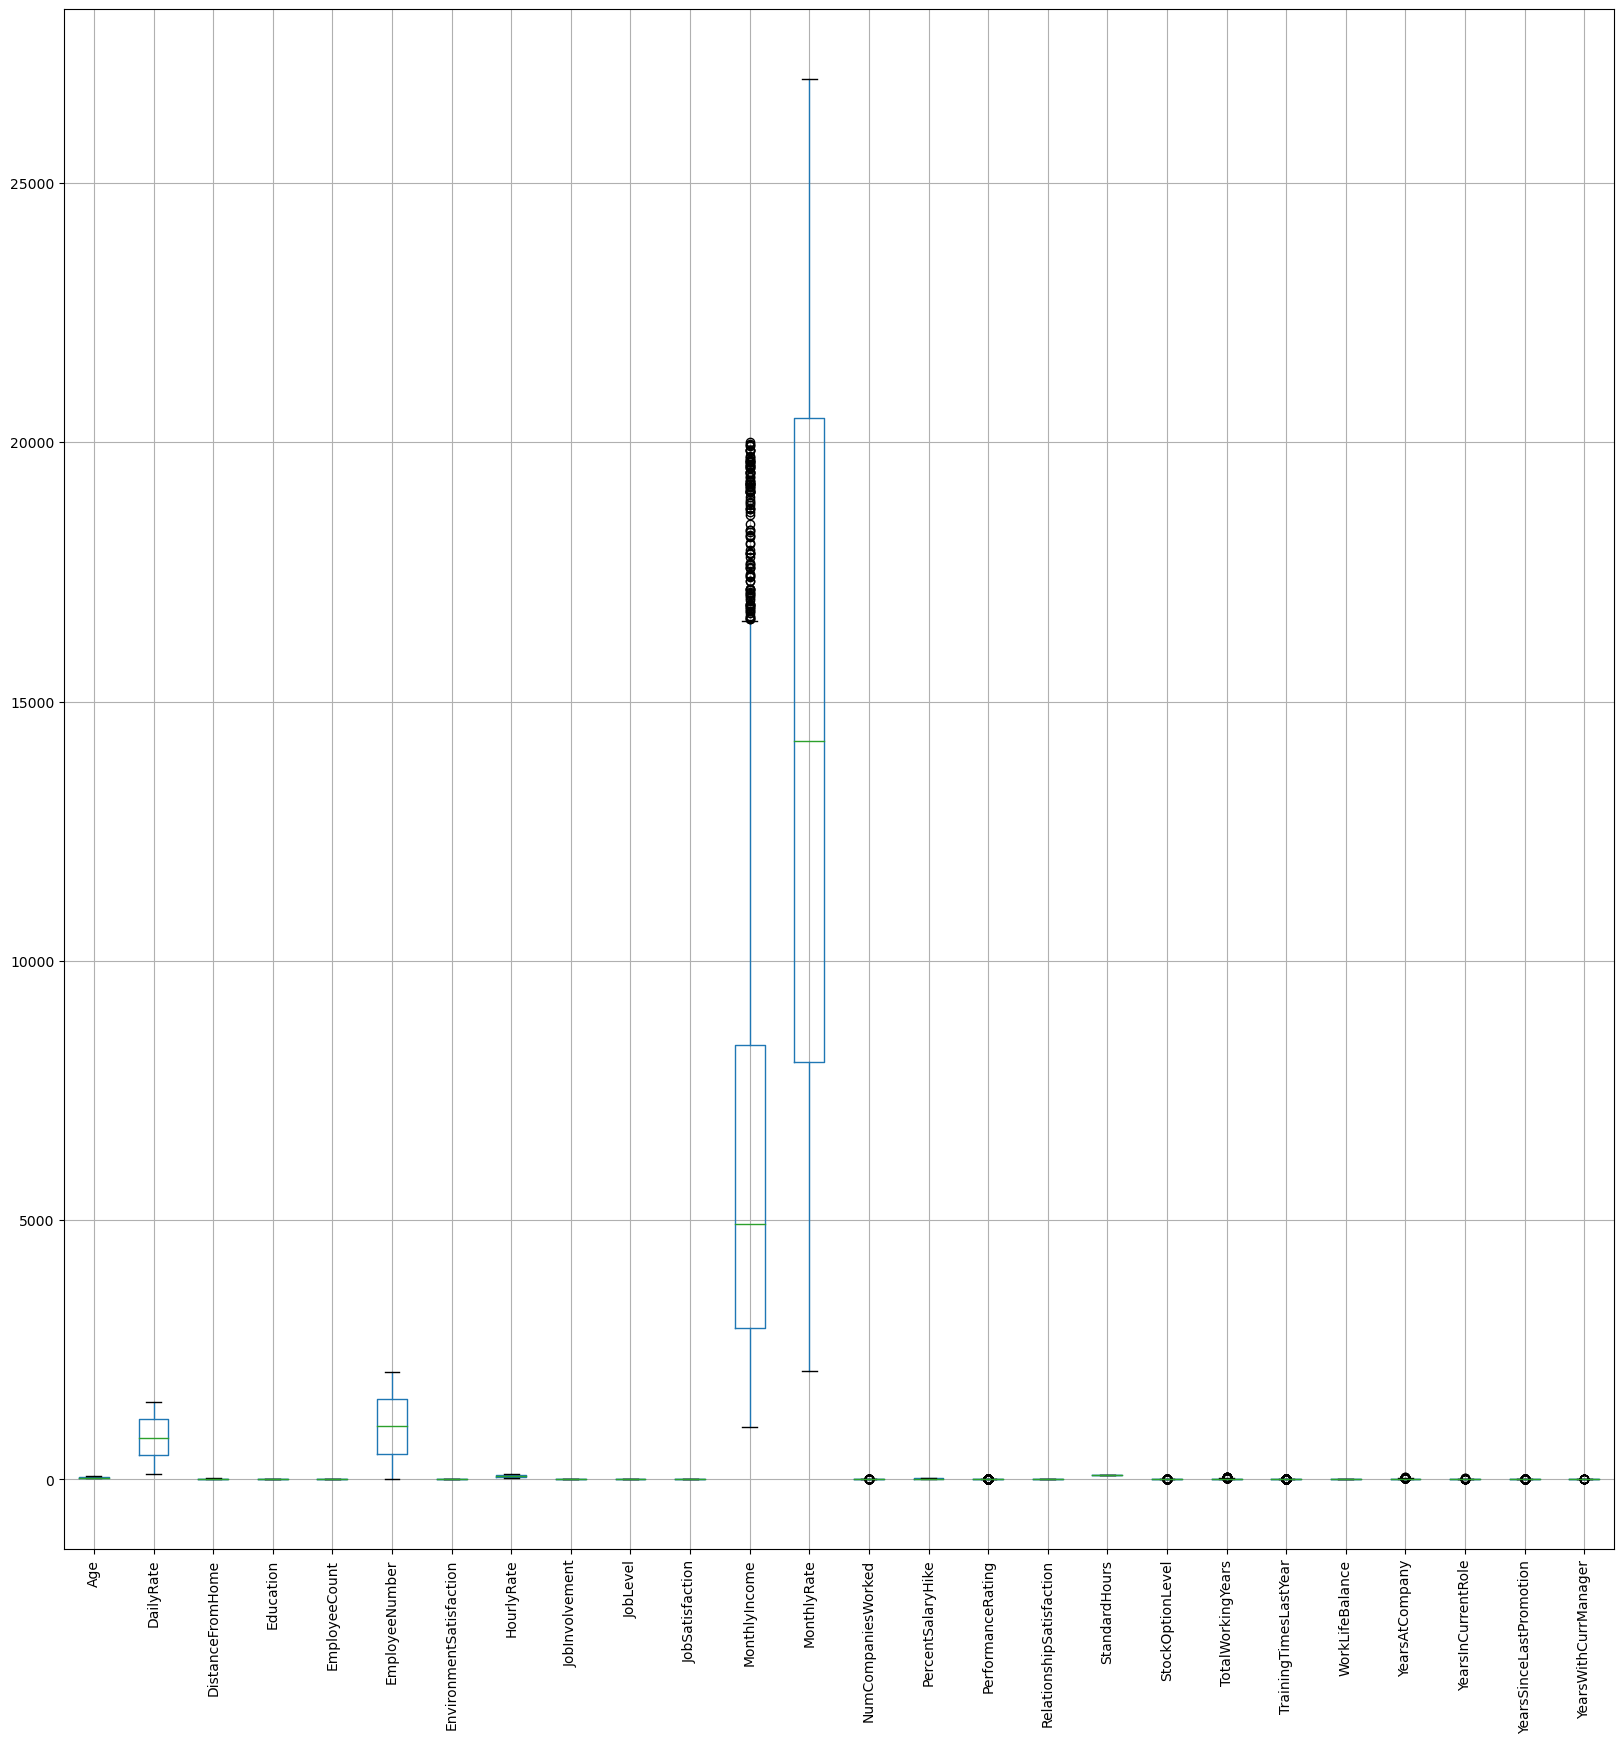

In [28]:
import matplotlib.pyplot as plt
c=[]
l=[]
for y in fv.columns:
    if fv[y].dtype!="O":
        c.append(y)
    else:
        l.append(y)
plt.figure(figsize=(20,20))

fv[c].boxplot()
plt.xticks(rotation=90)

In [ ]:
# There is outlier in Monthly income column of dataset

In [ ]:
# Data Visualization

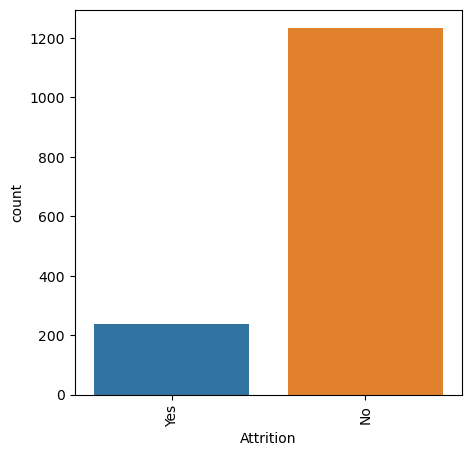

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(x='Attrition',data=data)
plt.xticks(rotation=90)
plt.show()

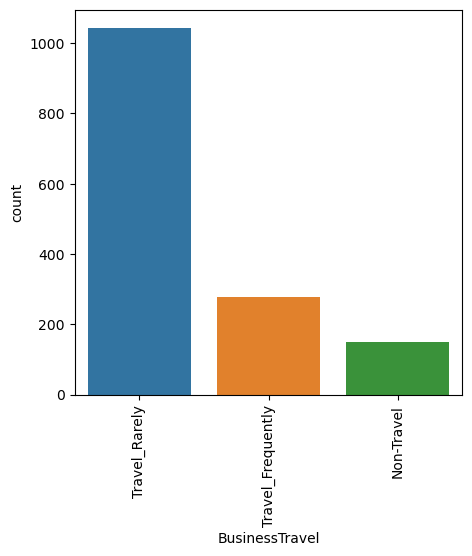

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(x='BusinessTravel',data=data)
plt.xticks(rotation=90)
plt.show()

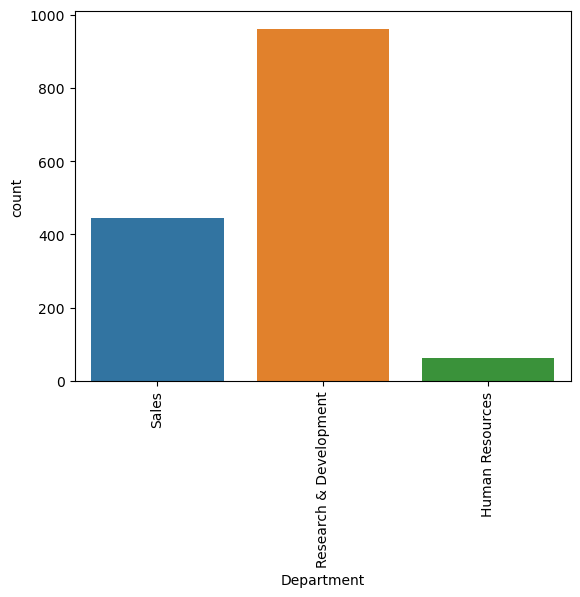

In [35]:
sns.countplot(x='Department',data=data)
plt.xticks(rotation=90)
plt.show()

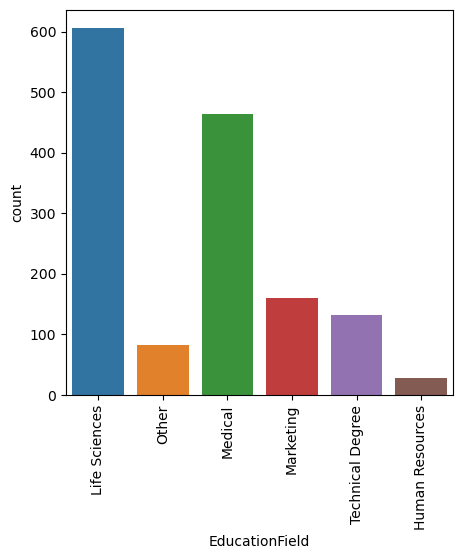

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x='EducationField',data=data)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

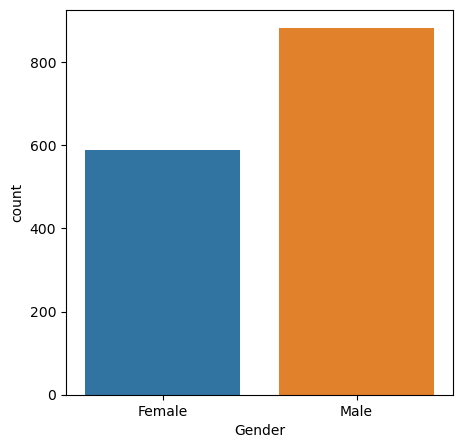

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender',data=data)